In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import seaborn as sb
import os
import time

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
((x_dat, y_dat), (x_test, y_test)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
def process_labels_SL(data_samples, data_labels):

    m = data_samples.shape[0]
    # normalize train and test images
    mean_dat = np.mean(data_samples, axis = 0).reshape(1,-1); 
    sd_data = np.std(data_samples, axis = 0).reshape(1,-1)
    new_train = (data_samples - mean_dat) / sd_data

    # one-hot encode the labels
    max_label = 9 # there are 10 labels, 0 to 9 inclusive
    y_onehot_train = np.zeros((m,max_label+1))

    y_onehot_train[np.arange(m),data_labels.astype(int)] = 1

    # also return the non-one-hot encoded labels, to compare accuracy.
    return data_samples, data_labels, new_train, y_onehot_train

In [ ]:
data_samples, data_labels, new_samples, new_labels = process_labels_SL(data_samples, data_labels)

In [ ]:
new_labels.shape

(9298, 10)

In [ ]:
# Get class 0 data
class0_loc = np.argwhere(y_dat == 0)[:5].reshape(-1)
xdat0 = x_dat[class0_loc,:,:]

# Get class 6 data
class6_loc = np.argwhere(y_dat == 6)[:5].reshape(-1)
xdat6 = x_dat[class6_loc,:,:]

# Get class 4 data
class4_loc = np.argwhere(y_dat == 4)[:5].reshape(-1)
xdat4 = x_dat[class4_loc,:,:]

# Get class 2 data
class2_loc = np.argwhere(y_dat == 2)[:5].reshape(-1)
xdat2 = x_dat[class2_loc,:,:]


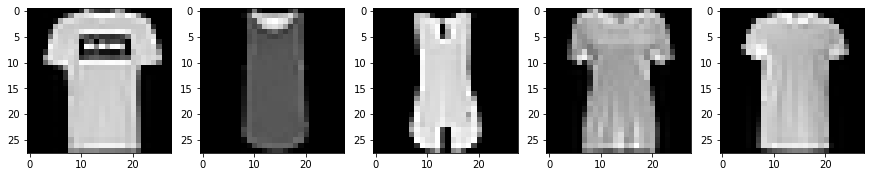

In [ ]:
fig,ax = plt.subplots(1,5, figsize = (15,8))
for i in range(5):
  ax[i].imshow(xdat0[i], cmap = 'gray')

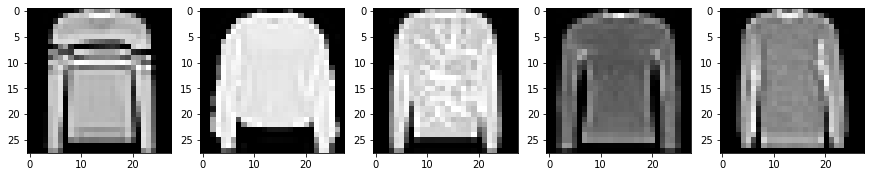

In [ ]:
fig,ax = plt.subplots(1,5, figsize = (15,8))
for i in range(5):
  ax[i].imshow(xdat2[i], cmap = 'gray')

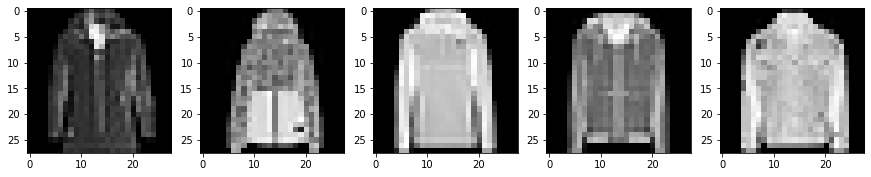

In [ ]:
fig,ax = plt.subplots(1,5, figsize = (15,8))
for i in range(5):
  ax[i].imshow(xdat4[i], cmap = 'gray')

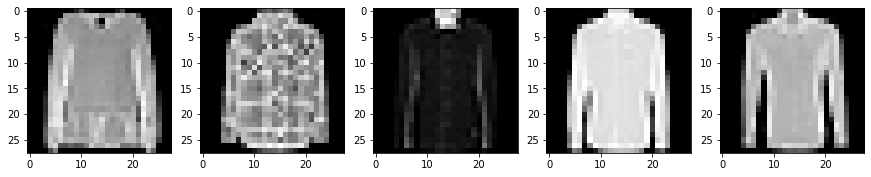

In [ ]:
fig,ax = plt.subplots(1,5, figsize = (15,8))
for i in range(5):
  ax[i].imshow(xdat6[i], cmap = 'gray')

In [ ]:
def reshape_data(data):
    # reshape image data to columns
    (m,d1,d2) = data.shape
    temp = np.zeros((d1*d2,m))
    for i in range(m):
        temp[:,i] = data[i,:,:].flatten('F')
    return temp

def process_data():
    ((x_dat, y_dat), (x_test, y_test)) = fashion_mnist.load_data()
    
    # split to training and val
    x_train = x_dat[0:50000]; x_val = x_dat[50000:];
    y_train = y_dat[0:50000]; y_val = y_dat[50000:];
    
    # reshape images to vectors
    x_train = reshape_data(x_train).T # data shape is now nData x nDim
    (m,dim) = x_train.shape
    x_val = reshape_data(x_val).T
    (m3,dim) = x_val.shape
    x_test = reshape_data(x_test).T
    (m2,dim) = x_test.shape

    # normalize train and test images
    mean_dat = np.mean(x_train, axis = 0).reshape(1,-1); 
    sd_data = np.std(x_train, axis = 0).reshape(1,-1)
    x_train = (x_train - mean_dat) / sd_data
    x_test = (x_test - mean_dat) / sd_data
    x_val = (x_val - mean_dat) / sd_data

    # one-hot encode the labels
    max_label = 9 # there are 10 labels, 0 to 9 inclusive
    y_onehot_train = np.zeros((m,max_label+1))
    y_onehot_test = np.zeros((m2,max_label+1))
    y_onehot_val = np.zeros((m3,max_label+1))

    y_onehot_train[np.arange(m),y_train] = 1
    y_onehot_test[np.arange(m2),y_test] = 1
    y_onehot_val[np.arange(m3),y_val] = 1

    # also return the non-one-hot encoded labels, to compare accuracy.
    return x_train, x_test, x_val, y_onehot_train, y_onehot_test, y_onehot_val, y_train, y_test, y_val

In [ ]:
# Reshape x_test to 3 dimensions
x_test = np.reshape(x_test, (-1,28,28))

In [ ]:
# Get class 0 test data
class0_loc = np.argwhere(y_test == 0)[:5].reshape(-1)
xdat0 = x_test[class0_loc,:,:]

# Get class 6 test data
class6_loc = np.argwhere(y_test == 6)[:5].reshape(-1)
xdat6 = x_test[class6_loc,:,:]

# Get class 4 test data
class4_loc = np.argwhere(y_test == 4)[:5].reshape(-1)
xdat4 = x_test[class4_loc,:,:]

# Get class 2 test data
class2_loc = np.argwhere(y_test == 2)[:5].reshape(-1)
xdat2 = x_test[class2_loc,:,:]


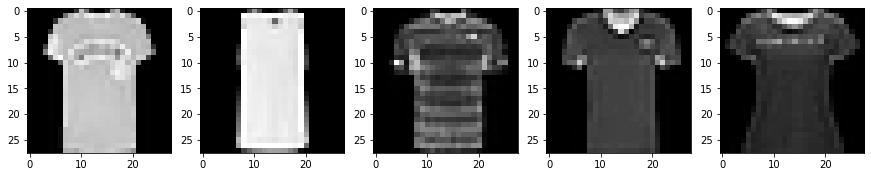

In [ ]:
fig,ax = plt.subplots(1,5, figsize = (15,8))
for i in range(5):
  ax[i].imshow(xdat0[i], cmap = 'gray')

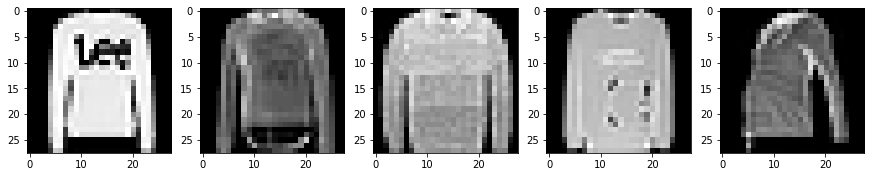

In [ ]:
fig,ax = plt.subplots(1,5, figsize = (15,8))
for i in range(5):
  ax[i].imshow(xdat2[i], cmap = 'gray')

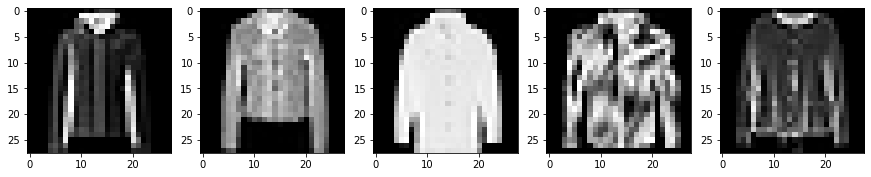

In [ ]:
fig,ax = plt.subplots(1,5, figsize = (15,8))
for i in range(5):
  ax[i].imshow(xdat4[i], cmap = 'gray')

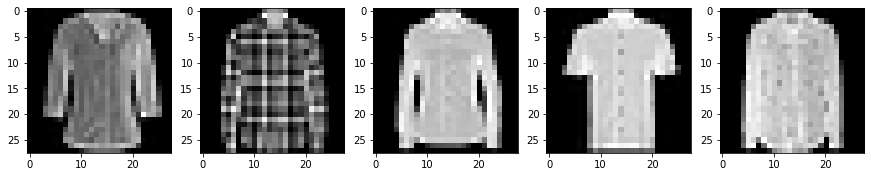

In [ ]:
fig,ax = plt.subplots(1,5, figsize = (15,8))
for i in range(5):
  ax[i].imshow(xdat6[i], cmap = 'gray')

In [ ]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

def build_model2(layers, nodes_per_layer, learn_rate, filter_bank, num_labels = 10, threshold = 0.5, hlactivation = "tanh", optimizer_name = "Adam"
, reg_coeff = 0, drop_prob = 0):
    """
    Constructs the model and return training, predict, loss evaluation, given the fed data and labels. This fed data and labels could
    be training or test labels
    inputs:
        layers : (1x1) number of layers in the MLP
        nodes_per_layer : (1 x L+1) array specifiying #nodes in each layer
        learn_rate : (1x1) learning rate
        num_labels: (1x1) number of classes in the problem, defaults to 10 as specificied
        threshold: (1x1) threshold posterior to consider as class 1
        hlactivation = (string) argument on the activation of hidden layers. Either "tanh", "relu" or "sigmoid". Assume all layers activation
        are identical except the output layer which will always be softmax
        optimizer_name : Name of the optimizer to use. Default is Adam Optimizer
        reg_coeff : L2 Regularization coeff, default is 0 i.e. no regularization
        drop_prob : Probability of drop out, defaults to 0 i.e. no dropout
    """
    # Construct Model
    # Here, we don't fix the batch size so that later, we can flexibly use the loss operator here to predict for whole data set
    # x = tf.placeholder(tf.float32, shape = [None, nodes_per_layer[0]]) # to hold the fed in data
    x = tf.placeholder(tf.float32, shape = [None, 16, 16, 1])
    y = tf.placeholder(tf.int64, shape = [None, num_labels]) # to hold one-hot encodings of the labels
    isTrain = tf.placeholder(tf.bool, shape = None) # to enable/ disable dropout

    # Define Hidden Layers
    # Convolutional layers
    wc1 = tf.get_variable('W0', shape=(3,3,1,filter_bank), initializer=tf.initializers.glorot_uniform())
    bc1 = tf.get_variable('B0', shape=(filter_bank), initializer=tf.initializers.glorot_uniform())

    wc2 = tf.get_variable('W1', shape=(3,3,filter_bank,2*filter_bank), initializer=tf.initializers.glorot_uniform())
    bc2 = tf.get_variable('B1', shape=(2*filter_bank), initializer=tf.initializers.glorot_uniform())
    # wc1 = tf.Variable(initial_value = np.random.normal(size = (3,3,1,32)).astype(np.float32))
    # bc1 = tf.Variable(initial_value = np.random.normal(size = (32)).astype(np.float32))
    conv1 = conv2d(x, wc1, bc1)
    conv1 = maxpool2d(conv1, k = 2)
    conv2 = conv2d(conv1, wc2, bc2)
    out = maxpool2d(conv2, k = 2)
    out_shape = out.shape; out_flatten = out_shape[1] * out_shape[2] * out_shape[3]
    # Reshape
    out = tf.reshape(out, shape = [-1, out_flatten])

    # Fully connected layers
    for layer in range(1,len(nodes_per_layer)-1):
        out_node = nodes_per_layer[layer]
        if hlactivation == 'tanh':
            out = tf.layers.dense(out, out_node, activation = tf.nn.tanh, kernel_initializer =  tf.initializers.glorot_uniform,
                                    bias_initializer = tf.initializers.glorot_uniform)
            out = tf.layers.dropout(out, rate = drop_prob, training = isTrain)
        elif hlactivation == 'relu':
            out = tf.layers.dense(out, out_node, activation = tf.nn.relu, kernel_initializer =  tf.initializers.glorot_uniform,
                                    bias_initializer = tf.initializers.glorot_uniform)
            out = tf.layers.dropout(out, rate = drop_prob, training = isTrain)
        else:
            out = tf.layers.dense(out, out_node, activation = tf.nn.sigmoid, kernel_initializer =  tf.initializers.glorot_uniform,
                                    bias_initializer = tf.initializers.glorot_uniform)
            out = tf.layers.dropout(out, rate = drop_prob, training = isTrain)
    
    # Define output layer
    out = tf.layers.dense(out, num_labels, kernel_initializer =  tf.initializers.glorot_uniform, bias_initializer = tf.initializers.glorot_uniform) # create linear layer
    out_softmax = tf.nn.softmax(out)

    # Define loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=out))

    # Add L2 Regularization
    L2norms = [tf.nn.l2_loss(weights) for weights in tf.trainable_variables()]
    L2 = tf.reduce_sum(L2norms)
    loss_L2 = loss + reg_coeff * L2

    # Add Predictions
    predictions = tf.reshape(tf.argmax(out,1), [-1]) # for predictions, can argmax over un-normalized probabilities, since softmax doesnt change max position

    # Add Training Optimizer and Operation
    if optimizer_name == 'Adam':
        optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
    elif optimizer_name == 'SGD':
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learn_rate)
    elif optimizer_name == 'RMSProp':
        optimizer = tf.train.RMSPropOptimizer(learning_rate = learn_rate)
    elif optimizer_name == 'Adagrad':
        optimizer = tf.train.AdagradOptimizer(learning_rate = learn_rate)

    train_op = optimizer.minimize(loss_L2)

    # return the model as a dictionary, containing the loss evaluator (without L2), loss (with L2), predictions (in terms of labels)
    # train operation, and last layer output evaluator. ALso return the placeholders so we can feed later
    model_dict = {'loss': loss
                 ,'loss_L2': loss_L2
                 ,'predictions': predictions
                 ,'train_op': train_op
                 ,'out': out_softmax
                 , 'batch_size': batch_size
                 , 'input': x
                 , 'targets': y
                 , 'isTrain': isTrain}
    
    return model_dict


def train_model2(model, n_epochs, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh):
    """
    Performs training for n_epochs, using the given model, training data. Also evaluates training and validation acc and loss
    after every epoch.
    """
    # create arrays to store loss and accuracy at the end of every epoch
    train_acc_arr = []; train_loss_arr = []; val_acc_arr = []; val_loss_arr = []
    
    for epoch in range(n_epochs):
        print("Processing Epoch", epoch + 1)
        nData = x_train.shape[0]
        
        # Shuffle training data
        permute = np.random.permutation(nData);
        x_train = x_train[permute,:]
        y_train = y_train[permute]
        y_train_oh = y_train_oh[permute,:]
        
        # split to batches
        if batch_size >= nData:
            num_batch = 1
        else:
            num_batch = (nData // batch_size) + 1
        
        # train on each batch
        for batch_ind in range(num_batch):
            low_ind = (batch_ind) * batch_size
            high_ind = min(low_ind + batch_size, nData)
        
            batch = x_train[low_ind:high_ind, :]
            batch_lab = y_train_oh[low_ind:high_ind, :]

            # create feed dictionary to predict
            feed_train = {model['input']: batch,
                         model['targets']: batch_lab,
                         model['isTrain']: True}

            # train
            sess.run(model['train_op'], feed_dict = feed_train)
            
        # At the end of each epoch, evaluate acc and loss, append to array
        feed_alltrain = {model['input']: x_train,
                        model['targets']: y_train_oh,
                        model['isTrain']: False}
        
        feed_val = {model['input']: x_val,
                    model['targets']: y_val_oh,
                   model['isTrain']: False}
        
        # Note: Change here to print L2 included loss as well
        train_pred, train_loss = sess.run([model['predictions'], model['loss']], feed_dict = feed_alltrain)
        train_acc = np.mean(train_pred == y_train)
        
        val_pred, val_loss = sess.run([model['predictions'], model['loss']], feed_dict = feed_val)
        val_acc = np.mean(val_pred == y_val)
        
        print("Training acc and loss are",train_acc, "and", train_loss) 
        print("Val acc and loss are", val_acc,"and", val_loss) # for debugging
        
        # Append these information
        train_acc_arr.append(train_acc); train_loss_arr.append(train_loss)
        val_acc_arr.append(val_acc); val_loss_arr.append(val_loss)
    
    return train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr
        

In [ ]:
def build_model(layers, nodes_per_layer, learn_rate, num_labels = 10, threshold = 0.5, hlactivation = "tanh", optimizer_name = "Adam"
, reg_coeff = 0, drop_prob = 0):
    """
    Constructs the model and return training, predict, loss evaluation, given the fed data and labels. This fed data and labels could
    be training or test labels
    inputs:
        layers : (1x1) number of layers in the MLP
        nodes_per_layer : (1 x L+1) array specifiying #nodes in each layer
        learn_rate : (1x1) learning rate
        num_labels: (1x1) number of classes in the problem, defaults to 10 as specificied
        threshold: (1x1) threshold posterior to consider as class 1
        hlactivation = (string) argument on the activation of hidden layers. Either "tanh", "relu" or "sigmoid". Assume all layers activation
        are identical except the output layer which will always be softmax
        optimizer_name : Name of the optimizer to use. Default is Adam Optimizer
        reg_coeff : L2 Regularization coeff, default is 0 i.e. no regularization
        drop_prob : Probability of drop out, defaults to 0 i.e. no dropout
    """
    # Construct Model
    # Here, we don't fix the batch size so that later, we can flexibly use the loss operator here to predict for whole data set
    x = tf.placeholder(tf.float32, shape = [None, nodes_per_layer[0]]) # to hold the fed in data
    y = tf.placeholder(tf.int64, shape = [None, num_labels]) # to hold one-hot encodings of the labels
    isTrain = tf.placeholder(tf.bool, shape = None) # to enable/ disable dropout

    # Define Hidden Layers
    out = x
    for layer in range(1,len(nodes_per_layer)-1):
        out_node = nodes_per_layer[layer]
        if hlactivation == 'tanh':
            out = tf.layers.dense(out, out_node, activation = tf.nn.tanh, kernel_initializer =  tf.initializers.glorot_uniform,
                                    bias_initializer = tf.initializers.glorot_uniform)
            out = tf.layers.dropout(out, rate = drop_prob, training = isTrain)
        elif hlactivation == 'relu':
            out = tf.layers.dense(out, out_node, activation = tf.nn.relu, kernel_initializer =  tf.initializers.glorot_uniform,
                                    bias_initializer = tf.initializers.glorot_uniform)
            out = tf.layers.dropout(out, rate = drop_prob, training = isTrain)
        else:
            out = tf.layers.dense(out, out_node, activation = tf.nn.sigmoid, kernel_initializer =  tf.initializers.glorot_uniform,
                                    bias_initializer = tf.initializers.glorot_uniform)
            out = tf.layers.dropout(out, rate = drop_prob, training = isTrain)
    
    # Define output layer
    out = tf.layers.dense(out, num_labels, kernel_initializer =  tf.initializers.glorot_uniform, bias_initializer = tf.initializers.glorot_uniform) # create linear layer
    out_softmax = tf.nn.softmax(out)

    # Define loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=out))

    # Add L2 Regularization
    L2norms = [tf.nn.l2_loss(weights) for weights in tf.trainable_variables()]
    L2 = tf.reduce_sum(L2norms)
    loss_L2 = loss + reg_coeff * L2

    # Add Predictions
    predictions = tf.reshape(tf.argmax(out,1), [-1]) # for predictions, can argmax over un-normalized probabilities, since softmax doesnt change max position

    # Add Training Optimizer and Operation
    if optimizer_name == 'Adam':
        optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
    elif optimizer_name == 'SGD':
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learn_rate)
    elif optimizer_name == 'RMSProp':
        optimizer = tf.train.RMSPropOptimizer(learning_rate = learn_rate)
    elif optimizer_name == 'Adagrad':
        optimizer = tf.train.AdagradOptimizer(learning_rate = learn_rate)

    train_op = optimizer.minimize(loss_L2)

    # return the model as a dictionary, containing the loss evaluator (without L2), loss (with L2), predictions (in terms of labels)
    # train operation, and last layer output evaluator. ALso return the placeholders so we can feed later
    model_dict = {'loss': loss
                 ,'loss_L2': loss_L2
                 ,'predictions': predictions
                 ,'train_op': train_op
                 ,'out': out_softmax
                 , 'batch_size': batch_size
                 , 'input': x
                 , 'targets': y
                 , 'isTrain': isTrain}
    
    return model_dict

In [ ]:
x_train, x_test, x_val, y_train_oh, y_test_oh, y_val_oh, y_train, y_test, y_val = process_data()

In [ ]:
# Check shapes
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train_oh.shape)
print(y_test_oh.shape)
print(y_val_oh.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(50000, 784)
(10000, 784)
(10000, 784)
(50000, 10)
(10000, 10)
(10000, 10)
(50000,)
(10000,)
(10000,)


In [ ]:
def train_model(model, n_epochs, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh):
    """
    Performs training for n_epochs, using the given model, training data. Also evaluates training and validation acc and loss
    after every epoch.
    """
    # create arrays to store loss and accuracy at the end of every epoch
    train_acc_arr = []; train_loss_arr = []; val_acc_arr = []; val_loss_arr = []
    
    for epoch in range(n_epochs):
        print("Processing Epoch", epoch + 1)
        nData, nDim = x_train.shape
        
        # Shuffle training data
        permute = np.random.permutation(nData);
        x_train = x_train[permute,:]
        y_train = y_train[permute]
        y_train_oh = y_train_oh[permute,:]
        
        # split to batches
        if batch_size >= nData:
            num_batch = 1
        else:
            num_batch = (nData // batch_size) + 1
        
        # train on each batch
        for batch_ind in range(num_batch):
            low_ind = (batch_ind) * batch_size
            high_ind = min(low_ind + batch_size, nData)
        
            batch = x_train[low_ind:high_ind, :]
            batch_lab = y_train_oh[low_ind:high_ind, :]

            # create feed dictionary to predict
            feed_train = {model['input']: batch,
                         model['targets']: batch_lab,
                         model['isTrain']: True}

            # train
            sess.run(model['train_op'], feed_dict = feed_train)
            
        # At the end of each epoch, evaluate acc and loss, append to array
        feed_alltrain = {model['input']: x_train,
                        model['targets']: y_train_oh,
                        model['isTrain']: False}
        
        feed_val = {model['input']: x_val,
                    model['targets']: y_val_oh,
                   model['isTrain']: False}
        
        # Note: Change here to print L2 included loss as well
        train_pred, train_loss = sess.run([model['predictions'], model['loss']], feed_dict = feed_alltrain)
        train_acc = np.mean(train_pred == y_train)
        
        val_pred, val_loss = sess.run([model['predictions'], model['loss']], feed_dict = feed_val)
        val_acc = np.mean(val_pred == y_val)
        
        print("Training acc and loss are",train_acc, "and", train_loss) 
        print("Val acc and loss are", val_acc,"and", val_loss) # for debugging
        
        # Append these information
        train_acc_arr.append(train_acc); train_loss_arr.append(train_loss)
        val_acc_arr.append(val_acc); val_loss_arr.append(val_loss)
    
    return train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr
        
        
        
        
    

In [ ]:
# Plots the loss and accuracy evolution during training 
def plot_loss_acc(loss, acc, title):
    fig = plt.figure(figsize=plt.figaspect(0.2))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(np.arange(len(loss)), loss,'r')
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.grid()
    ax1 = fig.add_subplot(1, 2, 2)
    ax1.plot(np.arange(len(acc)), acc)
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()
    best_epoch=np.argmax(acc)
    best_accuracy = max(acc)
    print('best_accuracy:',best_accuracy,'achieved at epoch:',best_epoch)

In [ ]:
def split_train_test(data_samples, data_labels, train_prop, test_prop, seed = 88):
    """
    Split to 80% train and 20% test as required, randomly by first shuffling
    """
    n_tot = data_samples.shape[0]; n_train = round(train_prop * n_tot)
    
    np.random.seed(seed)
    permute = np.random.permutation(n_tot)
    
    data_shuffled = data_samples[permute,:]
    data_shuffled_labels = data_labels[permute]
    
    train_samples = data_shuffled[:n_train, :]; train_labels = data_shuffled_labels[:n_train]
    test_samples = data_shuffled[n_train:, :]; test_labels = data_shuffled_labels[n_train:]
    
    return train_samples, train_labels, test_samples, test_labels

def process_labels_SL(train_samples, train_labels, test_samples, test_labels):

    m = train_samples.shape[0]; m2 = test_samples.shape[0]
    # normalize train and test images
    mean_dat = np.mean(train_samples, axis = 0).reshape(1,-1); 
    sd_data = np.std(train_samples, axis = 0).reshape(1,-1)
    new_train = (train_samples - mean_dat) / sd_data
    new_test = (test_samples - mean_dat) / sd_data


    # one-hot encode the labels
    max_label = 9 # there are 10 labels, 0 to 9 inclusive
    y_onehot_train = np.zeros((m,max_label+1))
    y_onehot_test = np.zeros((m2, max_label + 1))

    y_onehot_train[np.arange(m),train_labels] = 1
    y_onehot_test[np.arange(m2), test_labels] = 1

    # also return the non-one-hot encoded labels, to compare accuracy.
    return train_samples, train_labels, new_train, y_onehot_train, test_samples, test_labels, new_test, y_onehot_test 

In [ ]:
path_real_data = "/content/drive/My Drive/zipcombo.dat"
data = np.loadtxt(path_real_data)
data_samples = data[:, 1:]; data_labels = data[:, 0]

In [ ]:
train_samples, train_labels, test_samples, test_labels = split_train_test(data_samples, data_labels, 0.8, 0.2, seed = 98)
train_labels = train_labels.astype(int)
test_labels = test_labels.astype(int)

In [ ]:
train_samples, train_labels, new_train, train_oh, test_samples, test_labels, new_test, test_oh = process_labels_SL(train_samples, train_labels, test_samples, test_labels)

Parameters to cross validate: filter_bank size, layer size. Fix # layers, epochs, and learning rate, and regularization coefficient. Test outside for one configuration, and show why they are fixed. Values to try

1. filter bank size = 4, 8, 16, 32
2. layer size = 10, 100, 1000

For other values, reg_coeff = we saw no signs of overfitting, even for the largest model that we try, so there's no need for regularizing. For other parameters, they are chosen as such because we require the speed for training. Hence they are chosen in consideration of the training speed, and not validation performance. 

In [ ]:
new_train2 = new_train.reshape(-1, 16, 16, 1)
new_test2 = new_test.reshape(-1, 16, 16, 1)

nData, dim = new_samples.shape; num_labels = 10
layers = 2; nodes_per_layer = [1000, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 0; drop_prob = 0.0; filter_bank = 32
# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model2(layers, nodes_per_layer, learn_rate, filter_bank, num_labels = num_labels, reg_coeff = reg_coeff, drop_prob = drop_prob, hlactivation = 'relu', optimizer_name = "Adam")


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [ ]:
init = tf.initialize_all_variables()

sess.run(init)
start = time.time()
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model2(MLP, 200, batch_size, new_train2, train_labels, train_oh, new_test2, test_labels, test_oh)

print(f"Final validation error rate is {1 - val_acc_arr[-1]}")
print(time.time() - start)

Processing Epoch 1
Training acc and loss are 0.10473245496101102 and 2.2659364
Val acc and loss are 0.10268817204301076 and 2.2660036
Processing Epoch 2
Training acc and loss are 0.30586179080397957 and 2.162788
Val acc and loss are 0.3263440860215054 and 2.1589096
Processing Epoch 3
Training acc and loss are 0.3008873353051896 and 2.0906246
Val acc and loss are 0.3053763440860215 and 2.083682
Processing Epoch 4
Training acc and loss are 0.29712288249529445 and 2.0326555
Val acc and loss are 0.3032258064516129 and 2.0238488
Processing Epoch 5
Training acc and loss are 0.3053240118311374 and 1.9755288
Val acc and loss are 0.3161290322580645 and 1.9648796
Processing Epoch 6
Training acc and loss are 0.31876848615219144 and 1.9101739
Val acc and loss are 0.3263440860215054 and 1.897739
Processing Epoch 7
Training acc and loss are 0.34686743748319443 and 1.8345075
Val acc and loss are 0.3532258064516129 and 1.8204536
Processing Epoch 8
Training acc and loss are 0.4050820112933584 and 1.751

In [ ]:
nData, dim = new_samples.shape; num_labels = 10
layers = 4; nodes_per_layer = [dim, 1000, num_labels]; learn_rate = 0.01; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.0

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, reg_coeff = reg_coeff, drop_prob = drop_prob, hlactivation = 'relu')

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:268: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  warnings.warn('`tf.layers.dropout` is deprecated and '


In [ ]:
start = time.time()
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 200, batch_size, new_train, train_labels, train_oh, new_test, test_labels, test_oh)

print(f"Final validation error rate is {1 - val_acc_arr[-1]}")
print(time.time() - start)

Processing Epoch 1
Training acc and loss are 0.7144393654208121 and 0.7579296
Val acc and loss are 0.7118279569892473 and 0.78257793
Processing Epoch 2
Training acc and loss are 0.7165904813121807 and 0.7377834
Val acc and loss are 0.717741935483871 and 0.7487457
Processing Epoch 3
Training acc and loss are 0.7235816079591288 and 0.72729474
Val acc and loss are 0.7129032258064516 and 0.752306
Processing Epoch 4
Training acc and loss are 0.7299005108900242 and 0.70060545
Val acc and loss are 0.7387096774193549 and 0.7230561
Processing Epoch 5
Training acc and loss are 0.7499327776283947 and 0.67413163
Val acc and loss are 0.7564516129032258 and 0.6919871
Processing Epoch 6
Training acc and loss are 0.7588061306802903 and 0.6528041
Val acc and loss are 0.7623655913978494 and 0.6733262
Processing Epoch 7
Training acc and loss are 0.7577305727346061 and 0.6325849
Val acc and loss are 0.7537634408602151 and 0.66366965
Processing Epoch 8
Training acc and loss are 0.7768217262705028 and 0.599

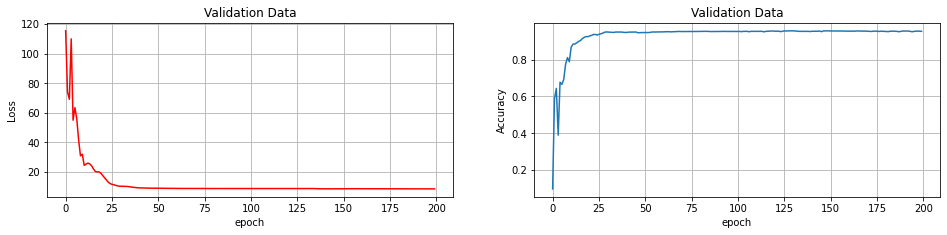

best_accuracy: 0.9564516129032258 achieved at epoch: 129


In [ ]:
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

# **Test 0** *(epoch = 1000, nodes_per_layer = [dim, 200, 100, 10]; activation = tanh; optimiser = Adam; learn_rate = 0.001; reg_coeff = 0.0; drop_prob = 0.0)*

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 3; nodes_per_layer = [dim, 200, 100, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 0.0; drop_prob = 0.0

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.40728 and 1.7635088
Val acc and loss are 0.4104 and 1.7584035
Processing Epoch 2
Training acc and loss are 0.59 and 1.3106408
Val acc and loss are 0.5986 and 1.301252
Processing Epoch 3
Training acc and loss are 0.65342 and 1.0842649
Val acc and loss are 0.6572 and 1.0726311
Processing Epoch 4
Training acc and loss are 0.6902 and 0.9477736
Val acc and loss are 0.6926 and 0.9366108
Processing Epoch 5
Training acc and loss are 0.71168 and 0.85361814
Val acc and loss are 0.7111 and 0.84477323
Processing Epoch 6
Training acc and loss are 0.72942 and 0.78730935
Val acc and loss are 0.7276 and 0.78140694
Processing Epoch 7
Training acc and loss are 0.74586 and 0.74076486
Val acc and loss are 0.7403 and 0.73762417
Processing Epoch 8
Training acc and loss are 0.75724 and 0.7065513
Val acc and loss are 0.7536 and 0.7056287
Processing Epoch 9
Training acc and loss are 0.76782 and 0.6782181
Val acc and loss are 0.7642 and 0.67880136
Processing Epoch 

In [ ]:
print(f"Highest validation accuracy obtained is {np.max(val_acc_arr)} at epoch {np.argmax(val_acc_arr)+1} with a corresponding training accuracy of {train_acc_arr[np.argmax(val_acc_arr)]}")

Highest validation accuracy obtained is 0.8897 at epoch 365 with a corresponding training accuracy of 0.97694


In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

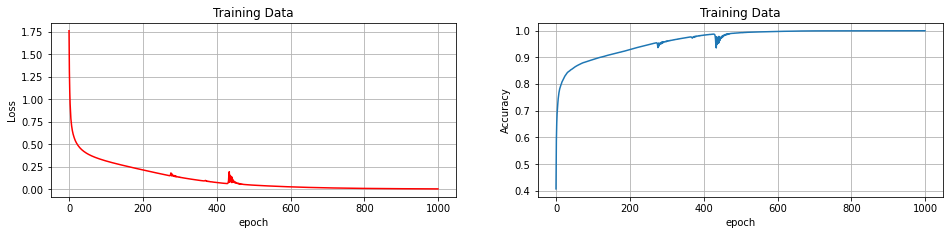

best_accuracy: 1.0 achieved at epoch: 937


In [ ]:
# Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

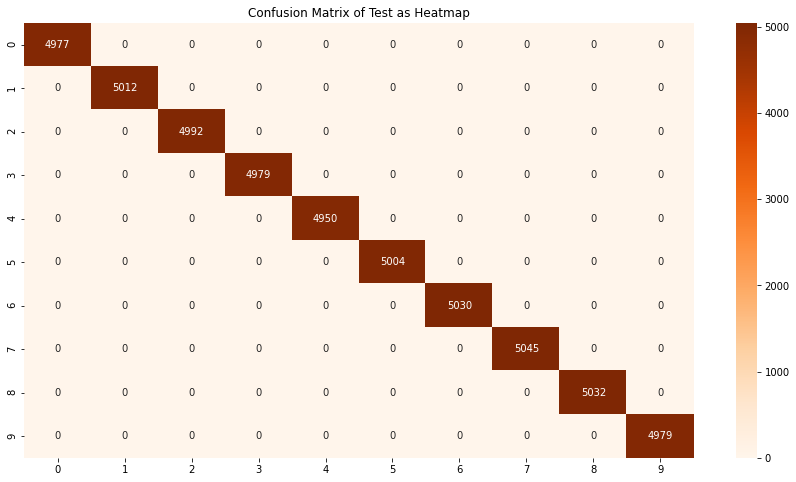

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training set
cmatrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

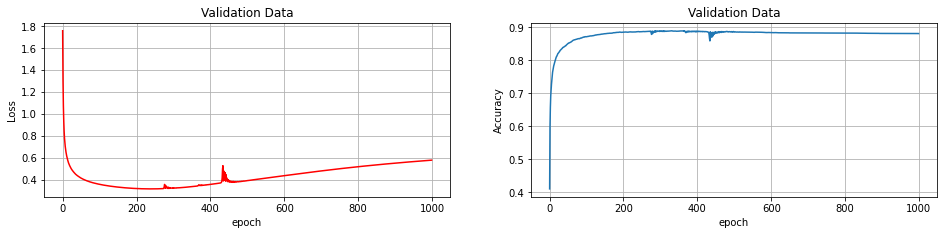

best_accuracy: 0.8897 achieved at epoch: 364


In [ ]:
# Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

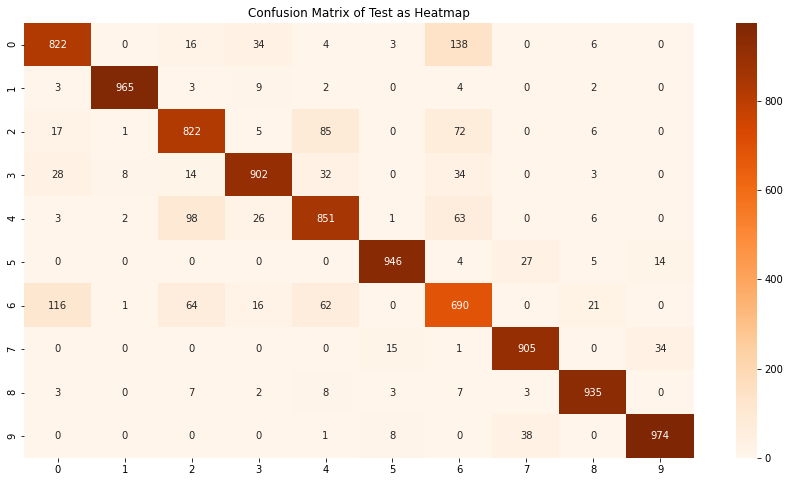

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation set
cmatrix = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.62919533
0.8744


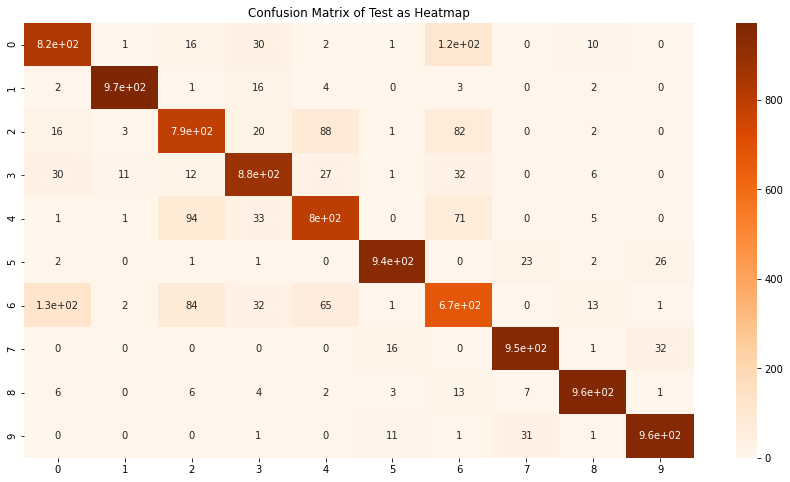

In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

# **Test 1** *(Revised: learn_rate=0.01; reg_coeff=2e-06; drop_prob=0.04)*

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 3; nodes_per_layer = [dim, 200, 100, num_labels]; learn_rate = 0.01; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.58938 and 1.4000121
Val acc and loss are 0.5847 and 1.3804358
Processing Epoch 2
Training acc and loss are 0.57786 and 1.0738899
Val acc and loss are 0.5796 and 1.0760227
Processing Epoch 3
Training acc and loss are 0.71138 and 0.83320487
Val acc and loss are 0.7043 and 0.8421507
Processing Epoch 4
Training acc and loss are 0.7087 and 0.7861169
Val acc and loss are 0.7011 and 0.79436135
Processing Epoch 5
Training acc and loss are 0.71266 and 0.77089685
Val acc and loss are 0.7064 and 0.77811587
Processing Epoch 6
Training acc and loss are 0.742 and 0.70405227
Val acc and loss are 0.7399 and 0.70540595
Processing Epoch 7
Training acc and loss are 0.75142 and 0.6763807
Val acc and loss are 0.7511 and 0.6759165
Processing Epoch 8
Training acc and loss are 0.76232 and 0.65385807
Val acc and loss are 0.7607 and 0.65499324
Processing Epoch 9
Training acc and loss are 0.77696 and 0.6301841
Val acc and loss are 0.7733 and 0.63526994
Processing Ep

In [ ]:
print(f"Highest validation accuracy obtained is {np.max(val_acc_arr)} at epoch {np.argmax(val_acc_arr)+1} with a corresponding training accuracy of {train_acc_arr[np.argmax(val_acc_arr)]}")

Highest validation accuracy obtained is 0.8885 at epoch 463 with a corresponding training accuracy of 0.96534


In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

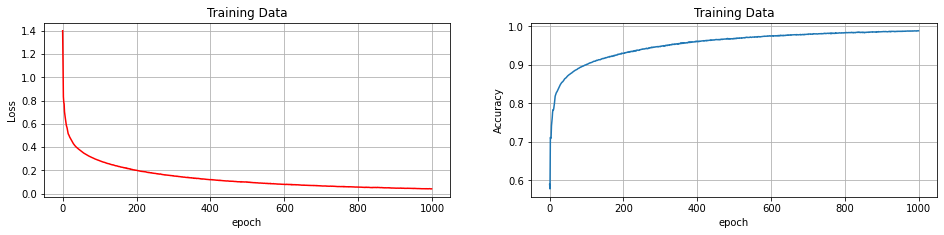

best_accuracy: 0.98866 achieved at epoch: 996


In [ ]:
# Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
cmatrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[4640,    3,   27,   53,    6,    1,  239,    0,    8,    0],
       [   2, 4985,    3,   17,    1,    0,    3,    0,    1,    0],
       [  19,    1, 4594,   30,  217,    0,  129,    0,    2,    0],
       [  60,    9,   14, 4783,   56,    0,   50,    0,    7,    0],
       [   2,    4,  213,   63, 4539,    0,  123,    0,    6,    0],
       [   0,    2,    0,    1,    0, 4975,    1,   12,    5,    8],
       [ 209,    2,  163,   42,  122,    1, 4479,    0,   11,    1],
       [   0,    0,    0,    0,    0,   45,    0, 4963,    3,   34],
       [   5,    1,    3,    8,   13,    4,   10,    3, 4983,    2],
       [   0,    0,    0,    0,    0,   21,    0,   48,    3, 4907]])

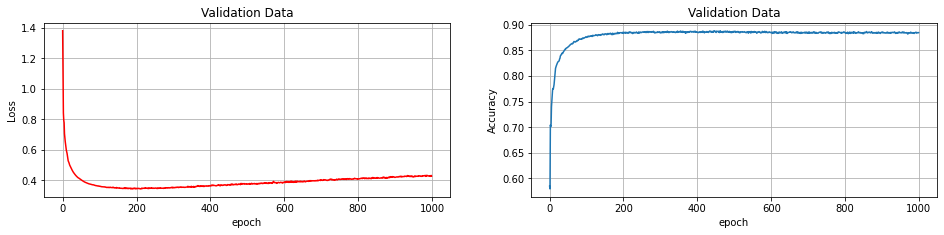

best_accuracy: 0.8885 achieved at epoch: 462


In [ ]:
# Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
cmatrix = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[829,   1,  18,  25,   3,   1, 138,   0,   7,   1],
       [  1, 963,   1,  16,   1,   0,   5,   0,   1,   0],
       [ 14,   0, 827,   6,  99,   0,  59,   0,   3,   0],
       [ 23,   3,   8, 927,  34,   0,  22,   0,   4,   0],
       [  4,   3,  83,  31, 864,   1,  59,   0,   5,   0],
       [  1,   0,   0,   0,   0, 955,   0,  24,   6,  10],
       [103,   3,  88,  16,  71,   0, 675,   0,  14,   0],
       [  0,   0,   1,   0,   0,  18,   0, 907,   0,  29],
       [  6,   0,   5,   2,   8,   4,   9,   3, 931,   0],
       [  0,   0,   0,   0,   0,  14,   0,  37,   0, 970]])

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.4621793
0.8788


In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

array([[829,   2,  10,  23,   4,   1, 126,   0,   5,   0],
       [  2, 963,   3,  24,   3,   0,   5,   0,   0,   0],
       [ 16,   1, 807,  11,  94,   1,  69,   0,   1,   0],
       [ 22,   7,  12, 887,  27,   0,  39,   0,   5,   1],
       [  0,   1,  86,  28, 822,   0,  57,   0,   6,   0],
       [  1,   0,   0,   1,   0, 947,   0,  29,   2,  20],
       [111,   2,  93,  28,  68,   0, 684,   0,  14,   0],
       [  0,   0,   0,   0,   0,  29,   0, 940,   1,  30],
       [  5,   1,   9,   4,   4,   4,  11,   5, 957,   0],
       [  0,   0,   0,   0,   0,  14,   1,  33,   0, 952]])

# **Test 2** *(Revised from Test 1: nodes=[dim, 128, 128, 10])*

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 3; nodes_per_layer = [dim, 128, 128, num_labels]; learn_rate = 0.01; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.56218 and 1.2171384
Val acc and loss are 0.5607 and 1.2097318
Processing Epoch 2
Training acc and loss are 0.61244 and 1.087631
Val acc and loss are 0.6126 and 1.082109
Processing Epoch 3
Training acc and loss are 0.68916 and 0.86478984
Val acc and loss are 0.6896 and 0.8628072
Processing Epoch 4
Training acc and loss are 0.72296 and 0.73185396
Val acc and loss are 0.7167 and 0.7310382
Processing Epoch 5
Training acc and loss are 0.74102 and 0.6927511
Val acc and loss are 0.7381 and 0.6904955
Processing Epoch 6
Training acc and loss are 0.75788 and 0.6658801
Val acc and loss are 0.7557 and 0.66548187
Processing Epoch 7
Training acc and loss are 0.76684 and 0.6491036
Val acc and loss are 0.7603 and 0.65222937
Processing Epoch 8
Training acc and loss are 0.77284 and 0.63793
Val acc and loss are 0.7658 and 0.6456857
Processing Epoch 9
Training acc and loss are 0.7802 and 0.62217355
Val acc and loss are 0.7731 and 0.63326794
Processing Epoch 1

In [ ]:
print(f"Highest validation accuracy obtained is {np.max(val_acc_arr)} at epoch {np.argmax(val_acc_arr)+1} with a corresponding training accuracy of {train_acc_arr[np.argmax(val_acc_arr)]}")

Highest validation accuracy obtained is 0.8874 at epoch 449 with a corresponding training accuracy of 0.95838


In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

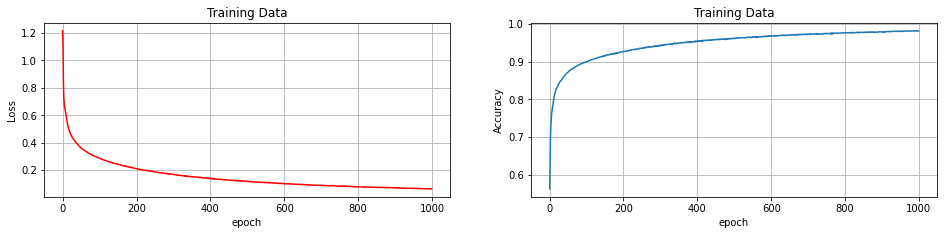

best_accuracy: 0.9818 achieved at epoch: 990


In [ ]:
# Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
cmatrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[4651,    7,   31,   53,    5,    1,  218,    0,   11,    0],
       [   6, 4974,    7,   18,    5,    0,    1,    0,    1,    0],
       [  44,    4, 4519,   24,  230,    0,  165,    0,    6,    0],
       [  64,   18,   18, 4745,   85,    0,   43,    0,    6,    0],
       [   5,    1,  237,   78, 4468,    0,  157,    0,    4,    0],
       [   1,    0,    0,    0,    0, 4966,    0,   15,    4,   18],
       [ 323,    5,  180,   64,  149,    1, 4295,    0,   13,    0],
       [   0,    0,    0,    0,    0,   39,    0, 4928,    4,   74],
       [  14,    3,    9,    8,   10,   12,   13,    2, 4961,    0],
       [   0,    0,    0,    0,    0,   17,    1,   28,    0, 4933]])

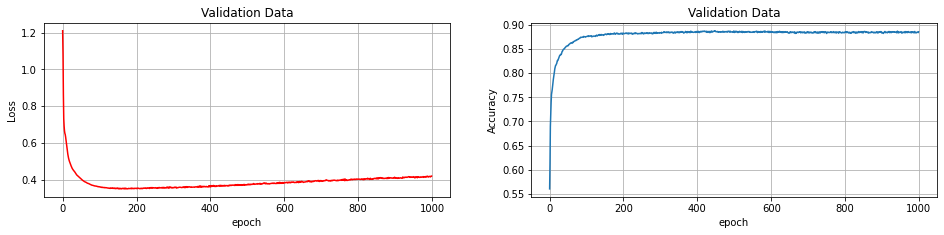

best_accuracy: 0.8874 achieved at epoch: 448


In [ ]:
# Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
cmatrix = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[858,   0,  16,  32,   1,   2, 107,   0,   7,   0],
       [  1, 965,   1,  15,   1,   0,   4,   0,   1,   0],
       [ 14,   2, 826,   8,  95,   0,  57,   0,   6,   0],
       [ 27,   6,   7, 916,  35,   0,  26,   0,   3,   1],
       [  3,   2,  77,  32, 875,   0,  57,   0,   4,   0],
       [  0,   0,   1,   0,   0, 942,   1,  33,   6,  13],
       [127,   2,  73,  15,  76,   0, 665,   0,  12,   0],
       [  0,   0,   0,   0,   0,  19,   0, 903,   1,  32],
       [  4,   0,   6,   1,   8,   2,  12,   4, 930,   1],
       [  0,   0,   0,   0,   0,  11,   0,  38,   0, 972]])

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.44592676
0.8781


In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

array([[848,   3,  13,  31,   4,   1,  91,   0,   9,   0],
       [  3, 963,   0,  25,   5,   0,   4,   0,   0,   0],
       [ 19,   1, 803,  14,  92,   1,  68,   0,   2,   0],
       [ 29,  12,  12, 874,  35,   1,  32,   0,   5,   0],
       [  1,   1,  90,  32, 817,   0,  52,   0,   7,   0],
       [  1,   0,   0,   1,   0, 946,   0,  25,   2,  25],
       [129,   1,  96,  23,  68,   0, 670,   0,  13,   0],
       [  0,   0,   0,   0,   0,  24,   0, 943,   0,  33],
       [  5,   1,   6,   6,   3,   4,  12,   5, 958,   0],
       [  0,   0,   0,   0,   0,   7,   1,  33,   0, 959]])

# **Test 3** *(Revised from Test 2: learn_rate = 0.001)*

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 3; nodes_per_layer = [dim, 128, 128, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.37326 and 1.7969756
Val acc and loss are 0.3729 and 1.7885436
Processing Epoch 2
Training acc and loss are 0.53474 and 1.4193331
Val acc and loss are 0.5388 and 1.4115381
Processing Epoch 3
Training acc and loss are 0.61896 and 1.1866249
Val acc and loss are 0.6188 and 1.1797061
Processing Epoch 4
Training acc and loss are 0.65538 and 1.04076
Val acc and loss are 0.6559 and 1.0346099
Processing Epoch 5
Training acc and loss are 0.67444 and 0.94623065
Val acc and loss are 0.6758 and 0.94092286
Processing Epoch 6
Training acc and loss are 0.68884 and 0.8804435
Val acc and loss are 0.6892 and 0.87616426
Processing Epoch 7
Training acc and loss are 0.70302 and 0.8308199
Val acc and loss are 0.7003 and 0.8276121
Processing Epoch 8
Training acc and loss are 0.71484 and 0.79072124
Val acc and loss are 0.713 and 0.7885441
Processing Epoch 9
Training acc and loss are 0.72684 and 0.7570468
Val acc and loss are 0.7241 and 0.75584817
Processing Epoch 

In [ ]:
print(f"Highest validation accuracy obtained is {np.max(val_acc_arr)} at epoch {np.argmax(val_acc_arr)+1} with a corresponding training accuracy of {train_acc_arr[np.argmax(val_acc_arr)]}")

Highest validation accuracy obtained is 0.8877 at epoch 990 with a corresponding training accuracy of 0.94878


In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

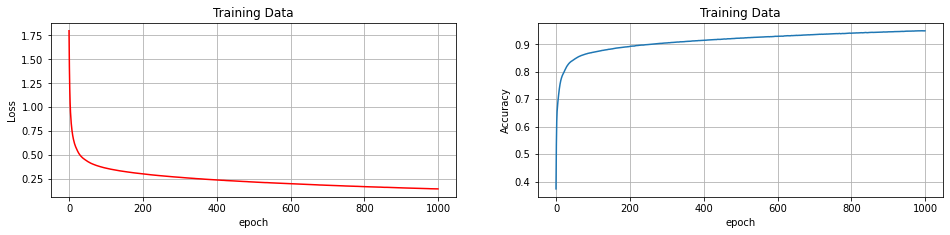

best_accuracy: 0.94894 achieved at epoch: 992


In [ ]:
# Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
cmatrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[4396,   14,   51,  110,   13,    1,  374,    0,   18,    0],
       [   9, 4950,    2,   44,    3,    1,    3,    0,    0,    0],
       [  45,    4, 4235,   35,  401,    0,  262,    1,    9,    0],
       [  86,   20,   25, 4621,  140,    0,   72,    1,   14,    0],
       [  12,    6,  302,  121, 4281,    0,  214,    0,   13,    1],
       [   0,    2,    1,    0,    0, 4902,    0,   72,    5,   22],
       [ 480,    7,  283,   93,  264,    2, 3883,    0,   18,    0],
       [   0,    0,    0,    0,    0,   67,    0, 4868,    3,  107],
       [   4,    2,    8,   17,    6,    1,   19,    2, 4973,    0],
       [   1,    0,    0,    0,    0,   19,    0,  101,    2, 4856]])

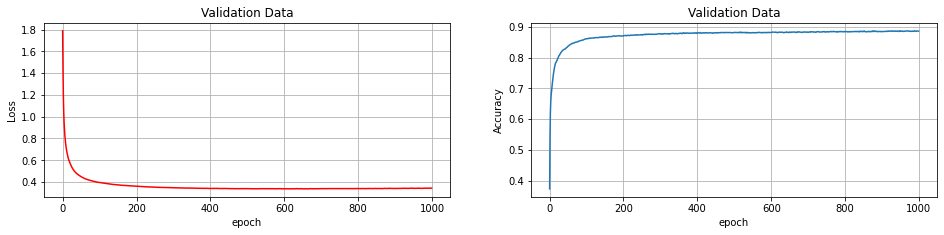

best_accuracy: 0.8877 achieved at epoch: 989


In [ ]:
# Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
cmatrix = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[858,   0,  12,  36,   3,   1, 106,   0,   7,   0],
       [  1, 962,   1,  16,   3,   0,   3,   0,   2,   0],
       [ 13,   1, 819,   8,  95,   0,  66,   0,   6,   0],
       [ 25,   3,   6, 923,  42,   0,  20,   0,   2,   0],
       [  1,   2,  74,  23, 881,   0,  64,   0,   5,   0],
       [  0,   0,   0,   0,   0, 943,   0,  31,   7,  15],
       [121,   2,  76,  18,  75,   0, 661,   0,  16,   1],
       [  0,   0,   1,   0,   0,  16,   0, 904,   1,  33],
       [  3,   0,   6,   3,   2,   1,  11,   3, 937,   2],
       [  0,   0,   0,   0,   0,   6,   0,  41,   0, 974]])

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.37203148
0.877


In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

array([[830,   2,   9,  33,   3,   1, 112,   0,  10,   0],
       [  3, 963,   1,  23,   4,   0,   5,   0,   1,   0],
       [ 15,   1, 786,  17, 103,   0,  74,   1,   3,   0],
       [ 28,   5,   9, 885,  34,   1,  32,   0,   6,   0],
       [  0,   1,  87,  31, 822,   1,  54,   0,   4,   0],
       [  1,   0,   0,   1,   0, 945,   0,  28,   3,  22],
       [122,   2,  88,  28,  72,   0, 672,   0,  16,   0],
       [  0,   0,   0,   0,   0,  20,   0, 952,   1,  27],
       [  4,   1,   3,   6,   3,   5,  15,   5, 958,   0],
       [  0,   0,   0,   1,   0,   7,   1,  34,   0, 957]])

# **Test 4** *(Revised from Test 3: activation = ReLU)*

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 3; nodes_per_layer = [dim, 128, 128, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, hlactivation = "relu", reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.34516 and 1.9681259
Val acc and loss are 0.3448 and 1.956796
Processing Epoch 2
Training acc and loss are 0.5066 and 1.60675
Val acc and loss are 0.5086 and 1.596198
Processing Epoch 3
Training acc and loss are 0.6057 and 1.3525919
Val acc and loss are 0.6083 and 1.3419358
Processing Epoch 4
Training acc and loss are 0.65348 and 1.1726726
Val acc and loss are 0.6554 and 1.1623123
Processing Epoch 5
Training acc and loss are 0.67944 and 1.0461428
Val acc and loss are 0.687 and 1.0366586
Processing Epoch 6
Training acc and loss are 0.69746 and 0.9573981
Val acc and loss are 0.7041 and 0.9490344
Processing Epoch 7
Training acc and loss are 0.70994 and 0.8923657
Val acc and loss are 0.7169 and 0.885102
Processing Epoch 8
Training acc and loss are 0.72242 and 0.840733
Val acc and loss are 0.7281 and 0.8345993
Processing Epoch 9
Training acc and loss are 0.73318 and 0.797135
Val acc and loss are 0.7362 and 0.791959
Processing Epoch 10
Training a

In [ ]:
print(f"Highest validation accuracy obtained is {np.max(val_acc_arr)} at epoch {np.argmax(val_acc_arr)+1} with a corresponding training accuracy of {train_acc_arr[np.argmax(val_acc_arr)]}")

Highest validation accuracy obtained is 0.893 at epoch 654 with a corresponding training accuracy of 0.95916


In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

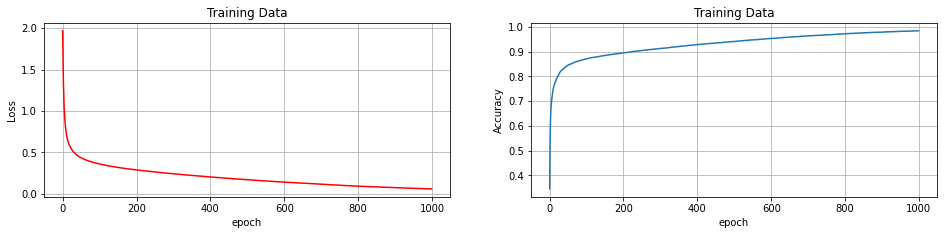

best_accuracy: 0.98418 achieved at epoch: 997


In [ ]:
# Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
cmatrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[4611,    4,   31,   65,    4,    0,  250,    0,   11,    1],
       [   9, 4941,    3,   45,    7,    0,    4,    1,    2,    0],
       [  37,    0, 4565,   25,  234,    0,  126,    1,    4,    0],
       [  55,   16,   15, 4737,   91,    1,   52,    1,   11,    0],
       [   5,    2,  136,   72, 4621,    1,  107,    0,    6,    0],
       [   1,    1,    0,    2,    0, 4927,    1,   38,   13,   21],
       [ 289,    1,  148,   73,  136,    1, 4370,    0,   11,    1],
       [   0,    0,    2,    2,    0,   32,    0, 4949,    3,   57],
       [   4,    4,   10,   14,   10,   13,   16,    5, 4952,    4],
       [   0,    1,    0,    0,    1,   23,    3,   63,    1, 4887]])

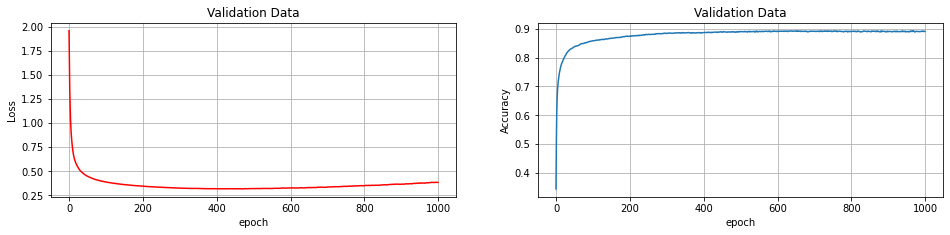

best_accuracy: 0.893 achieved at epoch: 653


In [ ]:
# Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
cmatrix = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[867,   1,  15,  30,   0,   4,  98,   0,   8,   0],
       [  5, 960,   0,  17,   3,   0,   1,   0,   2,   0],
       [ 12,   1, 850,   4,  77,   0,  57,   0,   7,   0],
       [ 23,   6,   6, 923,  38,   0,  23,   0,   2,   0],
       [  2,   1,  77,  29, 881,   1,  53,   0,   6,   0],
       [  0,   0,   0,   0,   0, 955,   0,  24,   7,  10],
       [114,   1,  85,  24,  70,   0, 660,   1,  14,   1],
       [  0,   0,   0,   0,   0,  16,   0, 906,   0,  33],
       [  4,   0,   5,   2,   3,   5,   9,   3, 934,   3],
       [  0,   0,   0,   0,   0,  10,   0,  38,   0, 973]])

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.40519166
0.886


In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

array([[836,   5,  14,  33,   1,   1,  99,   0,  11,   0],
       [  4, 965,   2,  19,   4,   0,   5,   0,   1,   0],
       [ 23,   1, 811,   8,  79,   1,  73,   1,   3,   0],
       [ 22,   7,   8, 897,  26,   0,  33,   0,   7,   0],
       [  0,   0,  86,  29, 839,   1,  43,   0,   2,   0],
       [  0,   0,   0,   0,   0, 962,   0,  20,   1,  17],
       [120,   1,  94,  27,  66,   1, 681,   0,  10,   0],
       [  0,   0,   0,   0,   0,  17,   0, 954,   1,  28],
       [  6,   1,   2,   7,   3,   7,   8,   5, 961,   0],
       [  0,   0,   0,   0,   0,   7,   1,  38,   0, 954]])

# **Test 5** *(Revised from Test 4: optimiser = SGD)*

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 3; nodes_per_layer = [dim, 128, 128, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, hlactivation = "relu", optimizer_name = 'RMSProp', reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.07336 and 2.6310225
Val acc and loss are 0.0746 and 2.6167364
Processing Epoch 2
Training acc and loss are 0.0747 and 2.6207678
Val acc and loss are 0.0757 and 2.6065948
Processing Epoch 3
Training acc and loss are 0.07614 and 2.6101146
Val acc and loss are 0.0764 and 2.5960617
Processing Epoch 4
Training acc and loss are 0.07754 and 2.5989912
Val acc and loss are 0.0783 and 2.585068
Processing Epoch 5
Training acc and loss are 0.07908 and 2.5874717
Val acc and loss are 0.0799 and 2.5736814
Processing Epoch 6
Training acc and loss are 0.0808 and 2.5755563
Val acc and loss are 0.0817 and 2.5619037
Processing Epoch 7
Training acc and loss are 0.0822 and 2.5632656
Val acc and loss are 0.0839 and 2.5497499
Processing Epoch 8
Training acc and loss are 0.0842 and 2.5504725
Val acc and loss are 0.0868 and 2.5370965
Processing Epoch 9
Training acc and loss are 0.08618 and 2.5371966
Val acc and loss are 0.0887 and 2.5239637
Processing Epoch 10
Trai

In [ ]:
print(f"Highest validation accuracy obtained is {np.max(val_acc_arr)} at epoch {np.argmax(val_acc_arr)+1} with a corresponding training accuracy of {train_acc_arr[np.argmax(val_acc_arr)]}")

Highest validation accuracy obtained is 0.7703 at epoch 999 with a corresponding training accuracy of 0.77362


In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

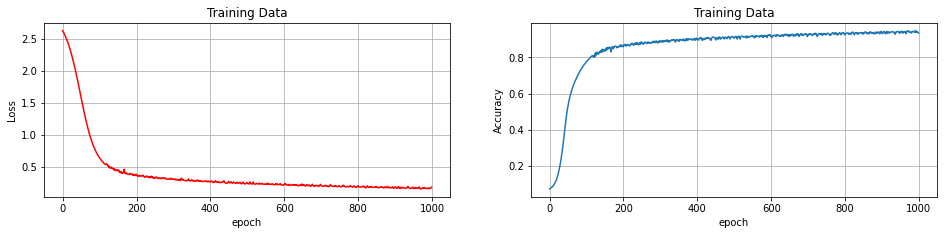

best_accuracy: 0.9477 achieved at epoch: 968


In [ ]:
#  Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
cmatrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[2795,  313,  339,  482,  255,  245,  299,   40,  197,   12],
       [ 205, 3869,   82,  604,   85,   53,   71,   25,   17,    1],
       [ 301,  118, 2076,  162, 1036,  236,  601,   51,  377,   34],
       [ 407,  927,  122, 2706,  261,  197,  191,   48,  105,   15],
       [ 221,  194,  994,  379, 2078,  103,  607,   37,  315,   22],
       [  56,   75,   66,   36,   26, 2575,   89, 1262,  241,  578],
       [ 850,  263,  979,  308,  939,  356,  778,   77,  437,   43],
       [   3,   11,   13,   13,    8,  829,   21, 3498,  141,  508],
       [ 123,   33,  145,  101,  180,  243,  316,  250, 3374,  267],
       [  38,   18,   52,   34,   40,  321,   50,  506,  221, 3699]])

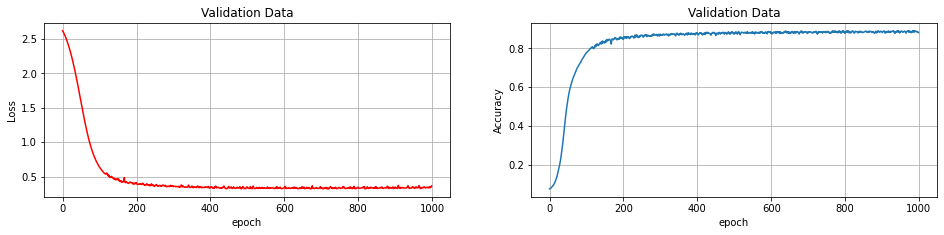

best_accuracy: 0.8906 achieved at epoch: 945


In [ ]:
#  Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
cmatrix = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[800,  38,  26,  63,  16,  48,   0,   0,  32,   0],
       [ 16, 928,   9,  26,   4,   3,   0,   0,   2,   0],
       [ 25,  15, 564,  10, 250,  75,  24,   1,  44,   0],
       [ 54,  95,   6, 788,  38,  29,   3,   0,   8,   0],
       [ 25,  40, 117,  56, 752,  22,  22,   0,  15,   1],
       [  0,   2,   0,   0,   1, 761,   2, 137,   6,  87],
       [214,  25, 178,  33, 266, 105,  85,   0,  62,   2],
       [  0,   0,   0,   0,   0, 116,   0, 757,   1,  81],
       [  5,   2,  11,  16,  12,  47,   6,  16, 844,   9],
       [  1,   1,   4,   1,   2,  26,   4,  42,   0, 940]])

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.9696291
0.7116


In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

array([[758,  43,  35,  63,  19,  52,   4,   1,  23,   2],
       [ 25, 923,   9,  29,   8,   2,   0,   0,   4,   0],
       [ 28,  30, 561,   7, 255,  42,  30,   0,  45,   2],
       [ 56, 106,  12, 733,  44,  35,   4,   0,  10,   0],
       [ 14,  28, 122,  53, 702,  30,  27,   0,  23,   1],
       [  0,   1,   1,   1,   0, 768,   1, 125,   5,  98],
       [225,  27, 187,  49, 276,  94,  72,   1,  66,   3],
       [  0,   0,   0,   0,   0,  92,   0, 823,   0,  85],
       [  7,   3,  14,  16,   9,  46,   7,  16, 874,   8],
       [  2,   0,   2,   1,   3,  32,   3,  53,   2, 902]])

# **Test 6** *(Revised from Test 5: epoch = 5000)*

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 3; nodes_per_layer = [dim, 128, 128, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, hlactivation = "relu", optimizer_name = 'SGD', reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 5000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Streaming output truncated to the last 5000 lines.
Training acc and loss are 0.77966 and 0.62699556
Val acc and loss are 0.77 and 0.63102746
Processing Epoch 3335
Training acc and loss are 0.77964 and 0.6269512
Val acc and loss are 0.77 and 0.6309842
Processing Epoch 3336
Training acc and loss are 0.77966 and 0.62690383
Val acc and loss are 0.7699 and 0.63093835
Processing Epoch 3337
Training acc and loss are 0.77968 and 0.62685573
Val acc and loss are 0.77 and 0.630891
Processing Epoch 3338
Training acc and loss are 0.7797 and 0.62680495
Val acc and loss are 0.77 and 0.63084143
Processing Epoch 3339
Training acc and loss are 0.7797 and 0.62675333
Val acc and loss are 0.77 and 0.6307921
Processing Epoch 3340
Training acc and loss are 0.77972 and 0.6267079
Val acc and loss are 0.77 and 0.630748
Processing Epoch 3341
Training acc and loss are 0.77976 and 0.62665904
Val acc and loss are 0.77 and 0.6307003
Processing Epoch 3342
Training acc and loss are 0.77974 and 0.62661463
Val acc and l

In [ ]:
print(f"Highest validation accuracy obtained is {np.max(val_acc_arr)} at epoch {np.argmax(val_acc_arr)+1} with a corresponding training accuracy of {train_acc_arr[np.argmax(val_acc_arr)]}")

Highest validation accuracy obtained is 0.7895 at epoch 4969 with a corresponding training accuracy of 0.79542


In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

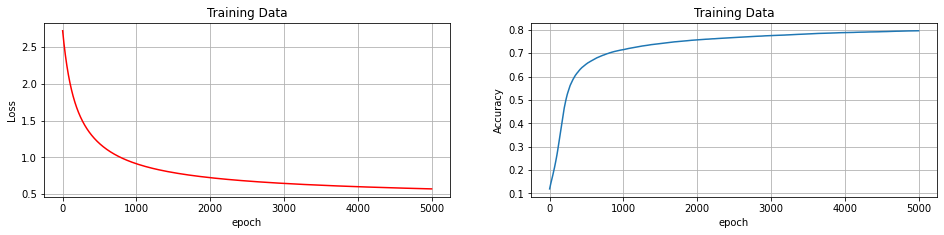

best_accuracy: 0.7956 achieved at epoch: 4988


In [ ]:
#  Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
cmatrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[3561,   44,  120,  468,   30,   44,  583,    6,  117,    4],
       [  40, 4537,   59,  248,   28,    5,   85,    0,    4,    6],
       [ 116,   20, 2941,   69,  883,   74,  780,    0,  103,    6],
       [ 324,  196,   88, 3828,  211,   32,  243,    5,   46,    6],
       [  20,   42,  800,  313, 2959,   37,  690,    1,   83,    5],
       [  19,    5,   18,   16,    7, 3644,   36,  806,  121,  332],
       [ 883,   35,  841,  264,  876,   78, 1842,    5,  197,    9],
       [   1,    5,    0,    3,    3,  589,    5, 3940,   58,  441],
       [  64,    7,   69,   57,   63,  193,  138,   84, 4307,   50],
       [   6,    2,    7,    9,    4,  288,    4,  359,   51, 4249]])

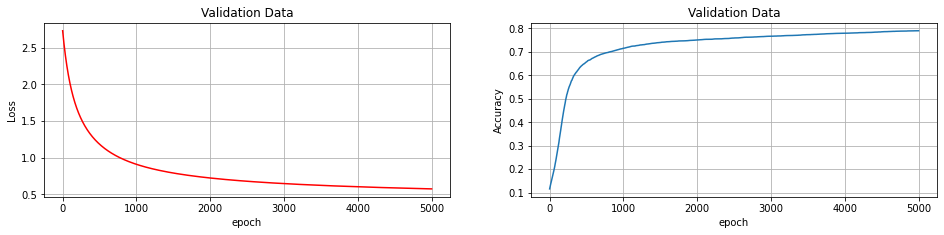

best_accuracy: 0.7895 achieved at epoch: 4968


In [ ]:
#  Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
cmatrix = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[843,   3,  11,  84,   2,   6,  53,   0,  19,   2],
       [  1, 921,  11,  45,   0,   0,   8,   0,   2,   0],
       [ 22,   2, 669,   4, 189,   4,  94,   0,  24,   0],
       [ 53,   7,   1, 887,  25,   0,  42,   0,   5,   1],
       [  1,   3, 102,  55, 773,   1, 106,   0,   9,   0],
       [  0,   0,   0,   0,   0, 768,   2, 170,   7,  49],
       [216,   3, 138,  47, 158,   4, 366,   1,  37,   0],
       [  0,   0,   0,   0,   0,  61,   0, 816,   1,  77],
       [ 12,   0,   3,   7,   1,  17,  18,   8, 896,   6],
       [  0,   0,   0,   0,   0,  20,   1,  44,   0, 956]])

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.5980206
0.786


In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

array([[805,   3,  14,  82,   4,   8,  61,   0,  23,   0],
       [  0, 931,  14,  43,   5,   0,   5,   0,   2,   0],
       [ 22,   1, 643,   9, 195,   5, 103,   0,  22,   0],
       [ 47,  11,   4, 852,  22,   1,  56,   0,   7,   0],
       [  0,   4, 106,  47, 743,   1,  87,   0,  12,   0],
       [  2,   0,   0,   1,   0, 785,   2, 151,   4,  55],
       [222,   2, 139,  56, 153,   8, 380,   1,  39,   0],
       [  0,   0,   0,   0,   0,  48,   0, 875,   1,  76],
       [ 12,   1,   6,   5,   3,  18,  14,  12, 926,   3],
       [  1,   0,   0,   0,   0,  25,   0,  53,   1, 920]])

# **Test 7** Using Grid Search to find the best hyperparameters

In [ ]:
learning_rate_values = [0.001, 0.055, 0.01]
hidden_layers = [32, 128, 300]

In [ ]:
nData, dim = x_train.shape 
num_labels = 10
layers = 3
batch_size = nData
reg_coeff = 2e-06
drop_prob = 0.4
min_loss = float('inf')
for hidden1 in hidden_layers:
  for hidden2 in hidden_layers:
    for learn_rate in learning_rate_values:
      print('Hidden 1 = '+str(hidden1))
      print('Hidden 2 = '+str(hidden2))
      print('Learning rate = '+str(learn_rate))
      nodes_per_layer = [dim, hidden1, hidden2, num_labels]
      # Reset everytime we build a new model.
      tf.reset_default_graph()
      sess = tf.Session()
      MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, hlactivation = "tanh", optimizer_name = 'Adam', reg_coeff = reg_coeff, drop_prob = drop_prob)
      # Initialize all variables in the constructed graph (resulting from model construction)
      init = tf.initialize_all_variables()
      sess.run(init)
      train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)
      if min_loss > min(val_loss_arr):
        min_loss = min(val_loss_arr)
        best_hidden_1 = hidden1
        best_hidden_2 = hidden2
        best_learning_rate = learn_rate
        best_train_loss_arr = train_loss_arr
        best_val_loss_arr = val_loss_arr
        best_train_acc_arr = train_acc_arr
        best_val_acc_arr = val_acc_arr
        print('Best hidden node 1: ', best_hidden_1)
        print('Best hidden node 2: ', best_hidden_2)
        print('Best learning rate: ', best_learning_rate)

print('Best hidden nodes:', best_hidden_1, ',', best_hidden_2, '\n', 'Best learning rate:', best_learning_rate)

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 3; nodes_per_layer = [dim, 300, 128, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, hlactivation = "tanh", optimizer_name = 'Adam', reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.51278 and 1.4499332
Val acc and loss are 0.506 and 1.4571884
Processing Epoch 2
Training acc and loss are 0.63194 and 1.1051925
Val acc and loss are 0.6283 and 1.1048174
Processing Epoch 3
Training acc and loss are 0.66522 and 0.9506824
Val acc and loss are 0.6655 and 0.94691604
Processing Epoch 4
Training acc and loss are 0.69378 and 0.8478272
Val acc and loss are 0.6961 and 0.8430835
Processing Epoch 5
Training acc and loss are 0.72014 and 0.77307737
Val acc and loss are 0.7219 and 0.76884717
Processing Epoch 6
Training acc and loss are 0.74122 and 0.7212122
Val acc and loss are 0.7406 and 0.71822315
Processing Epoch 7
Training acc and loss are 0.75636 and 0.68511313
Val acc and loss are 0.7531 and 0.6836449
Processing Epoch 8
Training acc and loss are 0.76518 and 0.65824115
Val acc and loss are 0.7622 and 0.65840954
Processing Epoch 9
Training acc and loss are 0.77268 and 0.63702446
Val acc and loss are 0.7682 and 0.6388878
Processing E

In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

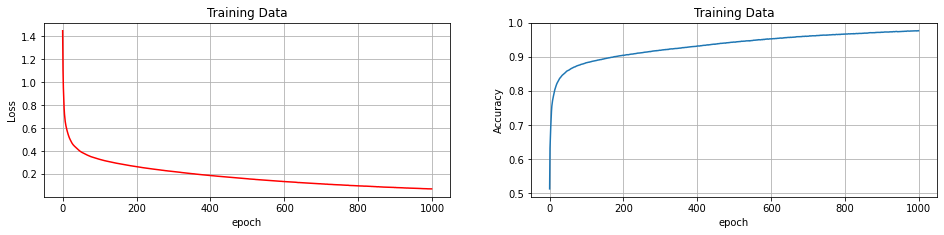

best_accuracy: 0.97742 achieved at epoch: 999


In [ ]:
#  Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
cmatrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[4564,    3,   45,   66,    6,    0,  283,    1,    9,    0],
       [   6, 4975,    1,   26,    0,    0,    2,    0,    1,    1],
       [  31,    2, 4474,   27,  294,    1,  161,    1,    1,    0],
       [  48,   24,   29, 4737,   88,    0,   47,    0,    6,    0],
       [   5,    5,  227,   96, 4456,    1,  158,    0,    2,    0],
       [   0,    1,    0,    1,    0, 4939,    0,   45,    6,   12],
       [ 297,    5,  176,   69,  162,    3, 4308,    0,    9,    1],
       [   0,    0,    0,    0,    0,   21,    0, 4971,    2,   51],
       [   5,    2,    3,    7,    5,    2,   12,    5, 4991,    0],
       [   0,    1,    0,    1,    0,    8,    0,   68,    1, 4900]])

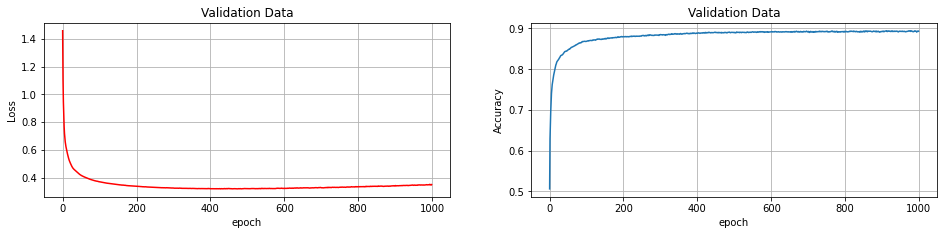

best_accuracy: 0.8944 achieved at epoch: 912


In [ ]:
#  Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
cmatrix = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

array([[852,   0,  16,  28,   3,   2, 116,   0,   6,   0],
       [  2, 965,   1,  13,   2,   0,   3,   0,   2,   0],
       [ 15,   1, 844,   4,  82,   0,  57,   0,   5,   0],
       [ 19,   3,   5, 930,  37,   0,  26,   0,   1,   0],
       [  1,   3,  71,  28, 885,   0,  57,   0,   5,   0],
       [  1,   0,   0,   0,   0, 946,   0,  30,   7,  12],
       [113,   1,  72,  18,  70,   0, 683,   0,  12,   1],
       [  0,   0,   1,   0,   0,  14,   0, 914,   0,  26],
       [  4,   0,   4,   3,   6,   1,   7,   4, 936,   3],
       [  0,   0,   0,   0,   0,   5,   0,  40,   0, 976]])

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.37190554
0.8872


In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

array([[829,   3,  16,  28,   3,   1, 111,   0,   9,   0],
       [  1, 971,   2,  19,   4,   0,   1,   0,   2,   0],
       [ 19,   1, 809,  11,  84,   0,  73,   1,   2,   0],
       [ 17,   8,  10, 903,  28,   1,  28,   0,   4,   1],
       [  0,   0,  81,  27, 837,   1,  52,   0,   2,   0],
       [  1,   0,   0,   1,   0, 945,   0,  30,   1,  22],
       [112,   0,  86,  28,  62,   0, 700,   0,  12,   0],
       [  0,   0,   0,   0,   0,  16,   0, 960,   0,  24],
       [  6,   0,   2,   7,   6,   3,  11,   6, 959,   0],
       [  0,   0,   0,   0,   0,   8,   1,  32,   0, 959]])

# **Test 8** *(Revised from test 7: Changing the epoch size from 1000 to 600)* **Best Model**

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 3; nodes_per_layer = [dim, 300, 128, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, hlactivation = "tanh", optimizer_name = 'Adam', reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 600, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.5024 and 1.4861325
Val acc and loss are 0.4987 and 1.4813821
Processing Epoch 2
Training acc and loss are 0.64298 and 1.0843589
Val acc and loss are 0.6441 and 1.0799321
Processing Epoch 3
Training acc and loss are 0.67812 and 0.9408923
Val acc and loss are 0.6764 and 0.93567693
Processing Epoch 4
Training acc and loss are 0.69688 and 0.85994595
Val acc and loss are 0.6983 and 0.8551362
Processing Epoch 5
Training acc and loss are 0.7131 and 0.7982899
Val acc and loss are 0.713 and 0.7948824
Processing Epoch 6
Training acc and loss are 0.72978 and 0.7483644
Val acc and loss are 0.7275 and 0.7466989
Processing Epoch 7
Training acc and loss are 0.74634 and 0.7086944
Val acc and loss are 0.7428 and 0.70846623
Processing Epoch 8
Training acc and loss are 0.75844 and 0.67822903
Val acc and loss are 0.7551 and 0.67897403
Processing Epoch 9
Training acc and loss are 0.7654 and 0.65492946
Val acc and loss are 0.7644 and 0.65625125
Processing Epoch

In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

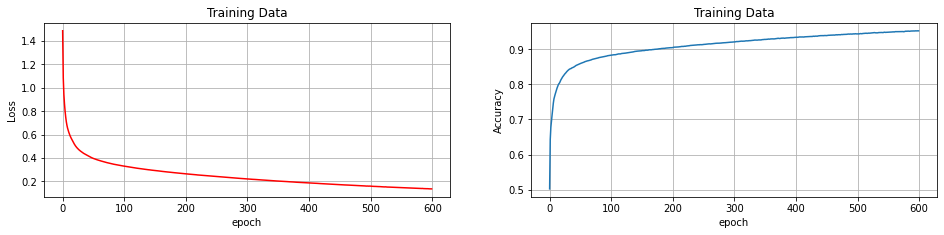

best_accuracy: 0.95246 achieved at epoch: 598


In [ ]:
#  Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

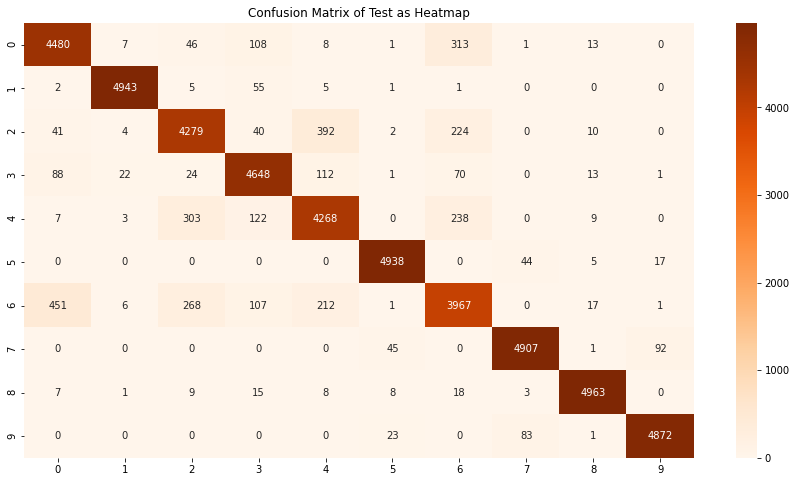

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
cmatrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

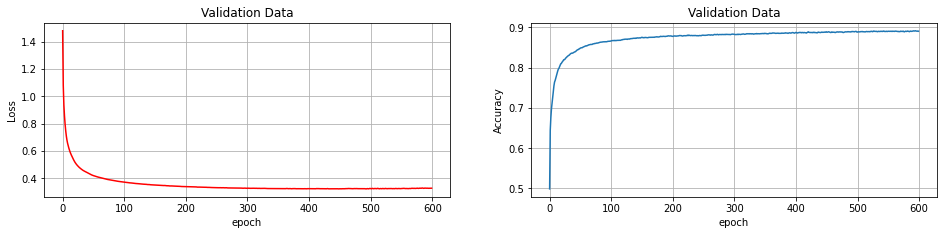

best_accuracy: 0.8919 achieved at epoch: 594


In [ ]:
#  Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

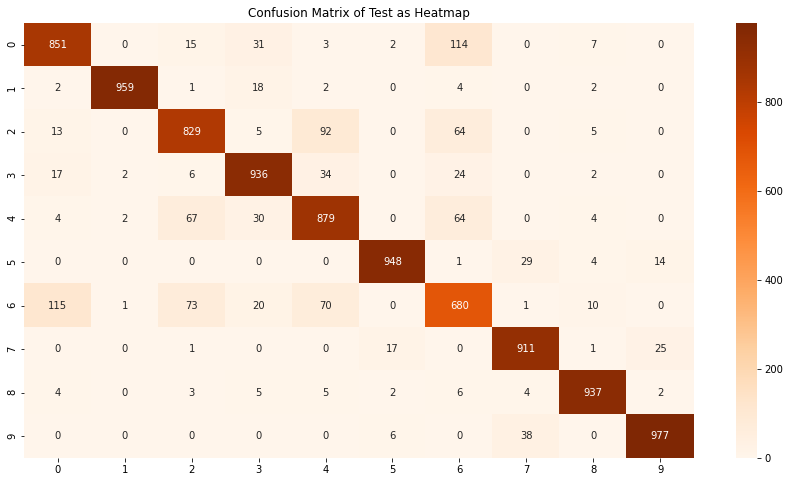

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
cmatrix = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.3526301
0.8817


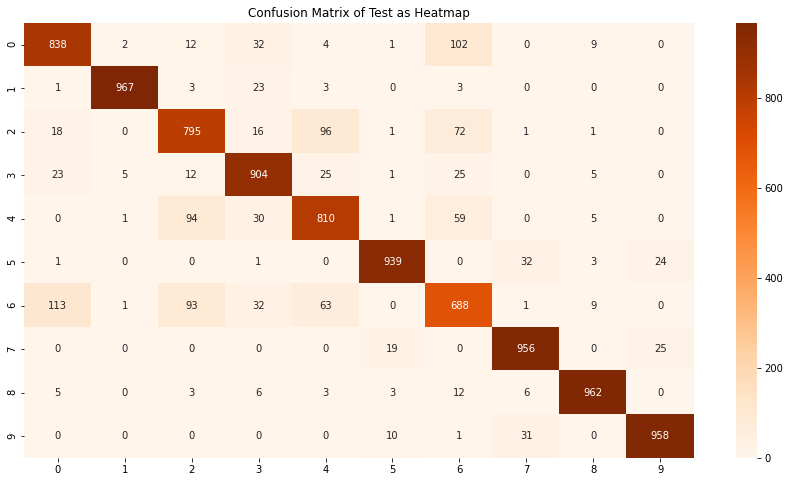

In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True, fmt = 'd')

# **Test 9** *Using 2 layer MLP with 300 nodes in the hidden layer*

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 2; nodes_per_layer = [dim, 300, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, hlactivation = "tanh", optimizer_name = 'Adam', reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.46408 and 1.5716621
Val acc and loss are 0.4641 and 1.5664607
Processing Epoch 2
Training acc and loss are 0.5985 and 1.17361
Val acc and loss are 0.6027 and 1.1630449
Processing Epoch 3
Training acc and loss are 0.67166 and 0.962812
Val acc and loss are 0.6758 and 0.9510094
Processing Epoch 4
Training acc and loss are 0.70678 and 0.8440525
Val acc and loss are 0.7091 and 0.8343626
Processing Epoch 5
Training acc and loss are 0.73068 and 0.76935476
Val acc and loss are 0.7313 and 0.7632954
Processing Epoch 6
Training acc and loss are 0.74916 and 0.7187739
Val acc and loss are 0.7477 and 0.71685046
Processing Epoch 7
Training acc and loss are 0.76358 and 0.68545586
Val acc and loss are 0.7617 and 0.6869826
Processing Epoch 8
Training acc and loss are 0.77104 and 0.6621622
Val acc and loss are 0.7697 and 0.6660245
Processing Epoch 9
Training acc and loss are 0.77758 and 0.6427036
Val acc and loss are 0.7731 and 0.6480041
Processing Epoch 10


In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

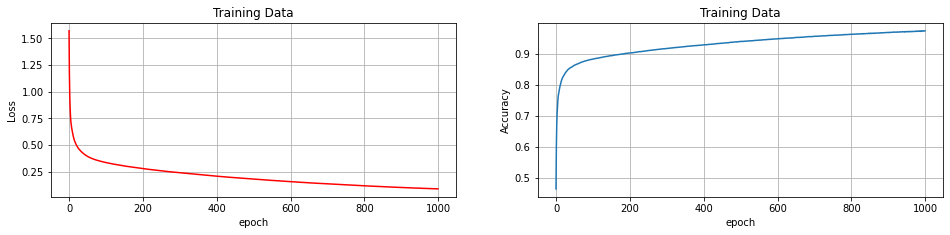

best_accuracy: 0.97422 achieved at epoch: 994


In [ ]:
#  Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
confusion_matrix(y_train, pred_train)

array([[4614,    3,   37,   84,    6,    1,  228,    0,    4,    0],
       [   5, 4974,    4,   25,    2,    0,    1,    0,    1,    0],
       [  40,    1, 4537,   26,  221,    1,  162,    0,    3,    1],
       [  67,   19,   31, 4692,   99,    0,   64,    0,    6,    1],
       [  13,    4,  255,   92, 4393,    0,  183,    0,   10,    0],
       [   1,    0,    0,    0,    0, 4940,    1,   55,    2,    5],
       [ 307,    4,  210,   70,  177,    1, 4250,    0,   11,    0],
       [   0,    0,    0,    0,    0,   19,    0, 4981,    3,   42],
       [   5,    1,    5,    9,   11,    2,    8,    3, 4987,    1],
       [   0,    1,    0,    0,    0,   13,    0,   83,    1, 4881]])

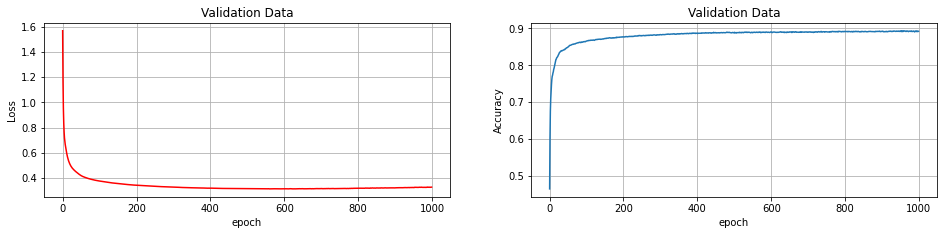

best_accuracy: 0.8935 achieved at epoch: 951


In [ ]:
#  Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
confusion_matrix(y_val, pred_val)

array([[859,   0,  15,  32,   2,   2, 105,   0,   7,   1],
       [  2, 966,   0,  12,   2,   0,   4,   0,   2,   0],
       [ 14,   0, 842,   9,  80,   0,  57,   0,   6,   0],
       [ 24,   5,   9, 923,  33,   0,  24,   0,   2,   1],
       [  3,   3,  82,  25, 875,   1,  56,   0,   5,   0],
       [  1,   0,   0,   0,   0, 946,   0,  31,   7,  11],
       [108,   2,  73,  16,  75,   0, 682,   0,  13,   1],
       [  0,   0,   1,   0,   0,  14,   0, 917,   1,  22],
       [  3,   1,   4,   4,   5,   2,   6,   4, 937,   2],
       [  0,   0,   0,   0,   0,   9,   0,  41,   0, 971]])

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.3545027
0.8851


In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

array([[841,   2,  17,  24,   5,   1,  99,   0,  11,   0],
       [  1, 967,   2,  22,   2,   0,   5,   0,   1,   0],
       [ 17,   1, 828,   8,  81,   1,  62,   1,   1,   0],
       [ 21,   6,  16, 891,  32,   1,  28,   0,   5,   0],
       [  1,   1,  96,  29, 819,   1,  50,   0,   3,   0],
       [  1,   0,   0,   1,   0, 942,   0,  32,   3,  21],
       [113,   0,  98,  26,  66,   0, 684,   0,  12,   1],
       [  0,   0,   0,   0,   0,  19,   0, 959,   1,  21],
       [  6,   1,   4,   5,   4,   4,   7,   5, 963,   1],
       [  0,   0,   0,   0,   0,   7,   1,  35,   0, 957]])

# **Test 10** *Using 2-layer MLP with 128 nodes in the hidden layer*

In [ ]:
nData, dim = x_train.shape; num_labels = 10
layers = 2; nodes_per_layer = [dim, 128, num_labels]; learn_rate = 0.001; batch_size = nData; reg_coeff = 2e-06; drop_prob = 0.4

# Reset everytime we build a new model.
tf.reset_default_graph()
sess = tf.Session()
MLP = build_model(layers, nodes_per_layer, learn_rate, num_labels = num_labels, hlactivation = "tanh", optimizer_name = 'Adam', reg_coeff = reg_coeff, drop_prob = drop_prob)

# Initialize all variables in the constructed graph (resulting from model construction)
init = tf.initialize_all_variables()
sess.run(init)

In [ ]:
train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = train_model(MLP, 1000, batch_size, x_train, y_train, y_train_oh, x_val, y_val, y_val_oh)

Processing Epoch 1
Training acc and loss are 0.3029 and 2.0005422
Val acc and loss are 0.304 and 1.999875
Processing Epoch 2
Training acc and loss are 0.51474 and 1.5167835
Val acc and loss are 0.5129 and 1.5135896
Processing Epoch 3
Training acc and loss are 0.58918 and 1.2454394
Val acc and loss are 0.5877 and 1.239143
Processing Epoch 4
Training acc and loss are 0.63698 and 1.0837244
Val acc and loss are 0.6371 and 1.074692
Processing Epoch 5
Training acc and loss are 0.66218 and 0.98522985
Val acc and loss are 0.6617 and 0.97477746
Processing Epoch 6
Training acc and loss are 0.67694 and 0.91806173
Val acc and loss are 0.6789 and 0.90736604
Processing Epoch 7
Training acc and loss are 0.69482 and 0.8626134
Val acc and loss are 0.6967 and 0.85229003
Processing Epoch 8
Training acc and loss are 0.71198 and 0.8142814
Val acc and loss are 0.7119 and 0.8046647
Processing Epoch 9
Training acc and loss are 0.7281 and 0.77342904
Val acc and loss are 0.7281 and 0.7648806
Processing Epoch 10

In [ ]:
feed_dictionary = {MLP['input'] : x_train
                  ,MLP['targets'] : y_train_oh
                  ,MLP['isTrain']: True}
feed_dictionary_val = {MLP['input'] : x_val,
                       MLP['targets'] : y_val_oh,
                      MLP['isTrain']: False}

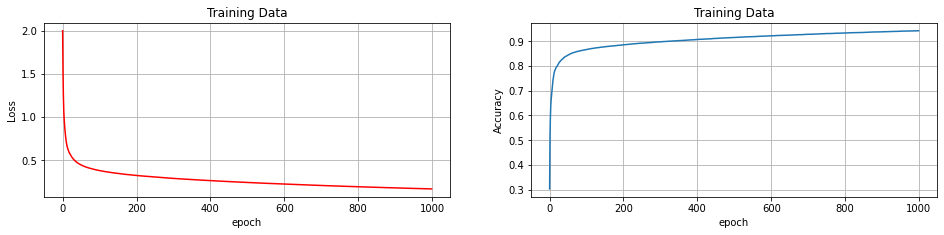

best_accuracy: 0.94304 achieved at epoch: 999


In [ ]:
#  Plot the cost function and the accuracy of the training data
plot_loss_acc(train_loss_arr, train_acc_arr, title='Training Data')

In [ ]:
pred_train = sess.run(MLP['predictions'], feed_dict = feed_dictionary)
# Display the confusion matrix of the training data
confusion_matrix(y_train, pred_train)

array([[4431,   10,   45,  106,   14,    2,  348,    0,   21,    0],
       [   5, 4941,    6,   47,    4,    1,    6,    0,    2,    0],
       [  56,    3, 4209,   37,  394,    4,  277,    0,   12,    0],
       [ 102,   30,   33, 4608,  121,    1,   74,    0,    9,    1],
       [   9,    7,  301,  123, 4239,    1,  263,    1,    6,    0],
       [   0,    2,    0,    3,    0, 4888,    0,   78,    8,   25],
       [ 489,    5,  285,   97,  285,    3, 3846,    0,   18,    2],
       [   0,    0,    0,    1,    0,   72,    0, 4866,    4,  102],
       [   6,    2,    9,   14,    9,    3,   22,    7, 4957,    3],
       [   0,    0,    0,    0,    0,   21,    0,  103,    1, 4854]])

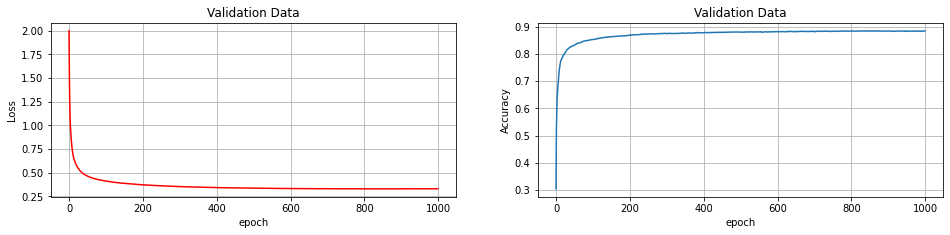

best_accuracy: 0.8852 achieved at epoch: 847


In [ ]:
#  Plot the cost function and the accuracy of the validation data
plot_loss_acc(val_loss_arr, val_acc_arr, title='Validation Data')

In [ ]:
pred_val = sess.run(MLP['predictions'], feed_dict = feed_dictionary_val)
# Display the confusion matrix of the validation data
confusion_matrix(y_val, pred_val)

array([[858,   0,  14,  36,   4,   2, 100,   0,   9,   0],
       [  3, 959,   0,  18,   2,   0,   5,   0,   1,   0],
       [ 15,   1, 819,  10,  90,   0,  62,   0,  11,   0],
       [ 26,   2,   6, 928,  36,   0,  20,   0,   3,   0],
       [  2,   3,  75,  27, 874,   1,  64,   0,   4,   0],
       [  0,   0,   0,   0,   0, 936,   0,  35,   8,  17],
       [124,   1,  81,  19,  69,   0, 658,   1,  17,   0],
       [  0,   0,   1,   0,   0,  17,   0, 908,   1,  28],
       [  3,   0,   4,   3,   5,   3,   9,   4, 935,   2],
       [  0,   0,   0,   0,   0,  10,   0,  42,   0, 969]])

In [ ]:
feed_test = {MLP['input']: x_test,
                MLP['targets']: y_test_oh,
                MLP['isTrain']: False}
# Note: Change here to print L2 included loss as well
test_pred, test_loss = sess.run([MLP['predictions'], MLP['loss']], feed_dict = feed_test)
test_acc = np.mean(test_pred == y_test)

# Display the cost and accuracy of the test data
print(test_loss)
print(test_acc)

0.35848033
0.8767


In [ ]:
# Display the confusion matrix of the test data
cmatrix = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (15,8))
plt.title("Confusion Matrix of Test as Heatmap")
sb.heatmap(cmatrix, cmap = 'Oranges', annot = True)

array([[832,   3,  10,  37,   6,   0, 100,   0,  11,   1],
       [  2, 961,   3,  25,   4,   0,   4,   0,   1,   0],
       [ 26,   1, 791,  11,  96,   1,  70,   1,   3,   0],
       [ 23,   6,   8, 893,  32,   1,  32,   0,   5,   0],
       [  0,   1,  89,  35, 816,   1,  51,   0,   7,   0],
       [  1,   0,   0,   1,   0, 938,   0,  33,   4,  23],
       [125,   1,  98,  34,  66,   0, 661,   0,  15,   0],
       [  0,   0,   0,   0,   0,  20,   0, 956,   0,  24],
       [  4,   1,   3,   5,   4,   5,  13,   5, 960,   0],
       [  0,   0,   0,   0,   0,   6,   1,  34,   0, 959]])